##  **1. Introduction** 

Ini Inroduction Final Project

## **2. Import Libraries** 

In [1]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

## **3. Data Loading** 

In [2]:
df= pd.read_csv('Shcroder_Dana_Prestasi_Plus.csv.xls')

In [3]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","34,015.461","33,941.512","34,241.578","33,864.031",0.42%
1,"Dec 04, 2022","33,872.602","35,026.199","35,026.199","33,872.602",-3.83%
2,"Nov 27, 2022","35,222.809","34,356.512","35,222.809","34,356.512",2.58%
3,"Nov 20, 2022","34,338.172","34,045.371","34,453.359","33,940.512",1.12%
4,"Nov 13, 2022","33,958.129","34,126.090","34,191.059","33,809.199",-1.18%
...,...,...,...,...,...,...
302,"Jan 29, 2017","29,760.340","29,760.340","29,760.340","29,760.340",0.62%
303,"Jan 22, 2017","29,577.289","29,577.289","29,577.289","29,577.289",0.70%
304,"Jan 15, 2017","29,371.279","29,371.279","29,371.279","29,371.279",-0.53%
305,"Jan 08, 2017","29,528.539","29,528.539","29,528.539","29,528.539",-1.51%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      307 non-null    object
 1   Price     307 non-null    object
 2   Open      307 non-null    object
 3   High      307 non-null    object
 4   Low       307 non-null    object
 5   Change %  307 non-null    object
dtypes: object(6)
memory usage: 14.5+ KB


In [5]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      307 non-null    datetime64[ns]
 1   Price     307 non-null    float64       
 2   Open      307 non-null    float64       
 3   High      307 non-null    float64       
 4   Low       307 non-null    float64       
 5   Change %  307 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.5 KB


In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,34015.461,33941.512,34241.578,33864.031,0.42
1,2022-12-04,33872.602,35026.199,35026.199,33872.602,-3.83
2,2022-11-27,35222.809,34356.512,35222.809,34356.512,2.58
3,2022-11-20,34338.172,34045.371,34453.359,33940.512,1.12
4,2022-11-13,33958.129,34126.090,34191.059,33809.199,-1.18
...,...,...,...,...,...,...
302,2017-01-29,29760.340,29760.340,29760.340,29760.340,0.62
303,2017-01-22,29577.289,29577.289,29577.289,29577.289,0.70
304,2017-01-15,29371.279,29371.279,29371.279,29371.279,-0.53
305,2017-01-08,29528.539,29528.539,29528.539,29528.539,-1.51


## **4. EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

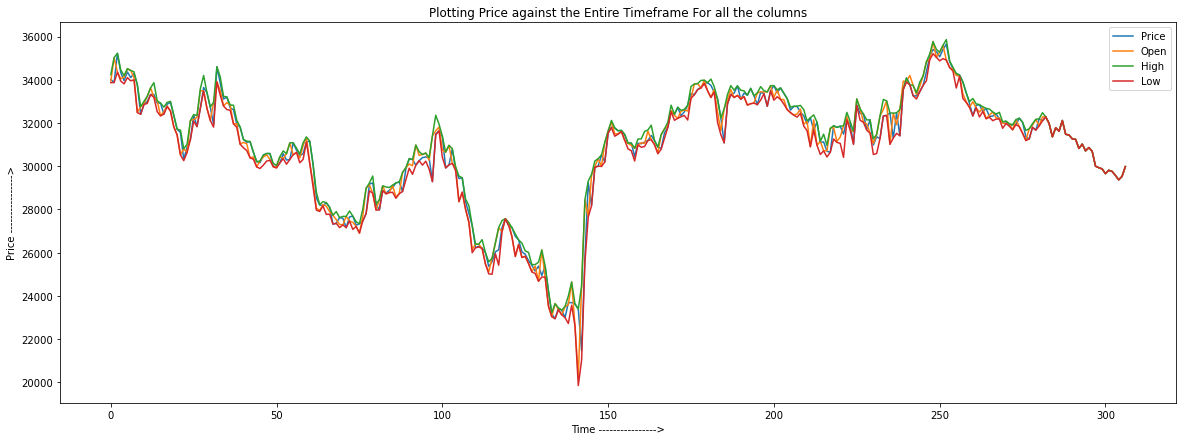

In [8]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

In [9]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [10]:
df

,index,Date,Price,Open,High,Low,Change %
0,306,2017-01-01,29982.369,29982.369,29982.369,29982.369,1.07
1,305,2017-01-08,29528.539,29528.539,29528.539,29528.539,-1.51
2,304,2017-01-15,29371.279,29371.279,29371.279,29371.279,-0.53
3,303,2017-01-22,29577.289,29577.289,29577.289,29577.289,0.70
4,302,2017-01-29,29760.340,29760.340,29760.340,29760.340,0.62
...,...,...,...,...,...,...,...
302,4,2022-11-13,33958.129,34126.090,34191.059,33809.199,-1.18
303,3,2022-11-20,34338.172,34045.371,34453.359,33940.512,1.12
304,2,2022-11-27,35222.809,34356.512,35222.809,34356.512,2.58
305,1,2022-12-04,33872.602,35026.199,35026.199,33872.602,-3.83


In [11]:
new_df=df[['Date','High','Low']]

In [12]:
new_df=new_df.set_index(['Date'])

In [13]:
new_df

,High,Low
Date,,
2017-01-01,29982.369,29982.369
2017-01-08,29528.539,29528.539
2017-01-15,29371.279,29371.279
2017-01-22,29577.289,29577.289
2017-01-29,29760.340,29760.340
...,...,...
2022-11-13,34191.059,33809.199
2022-11-20,34453.359,33940.512
2022-11-27,35222.809,34356.512


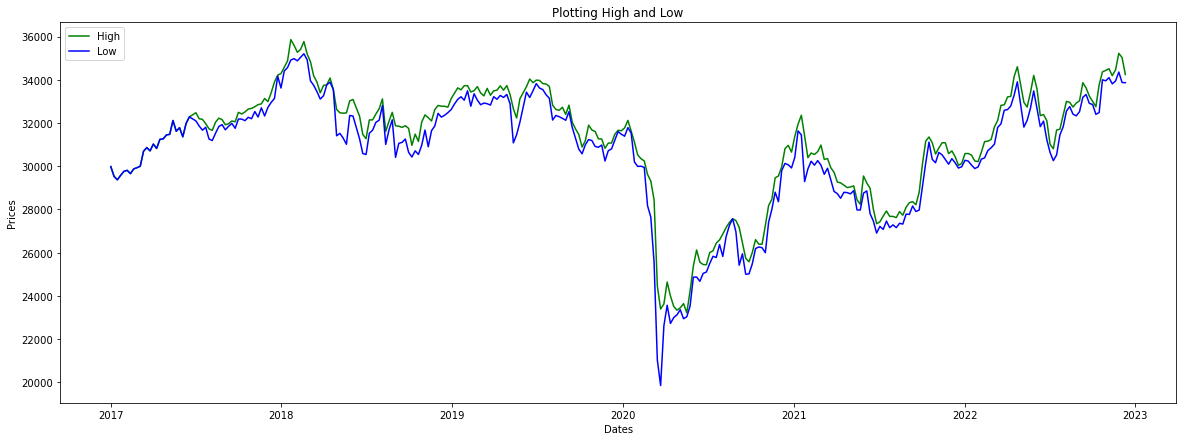

In [14]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Plotting High and Low')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **5. Data Preprocessing**

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1152x648 with 0 Axes>

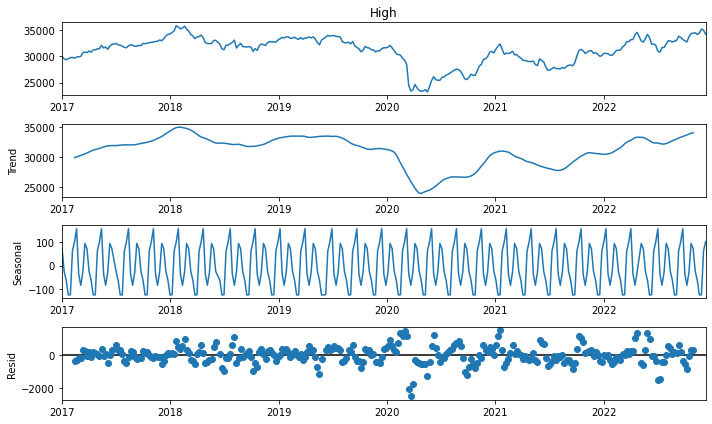

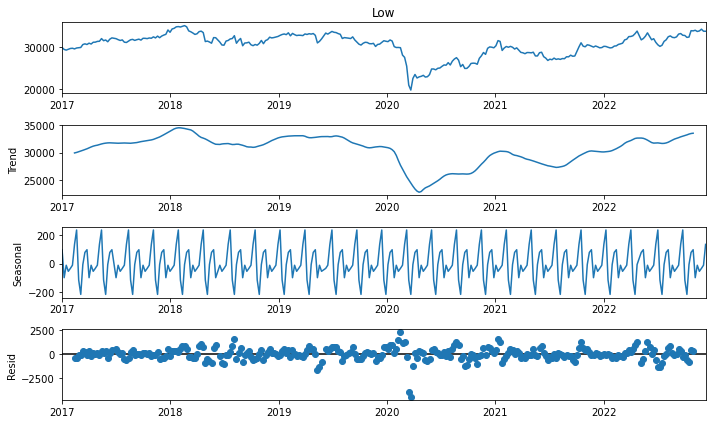

In [16]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

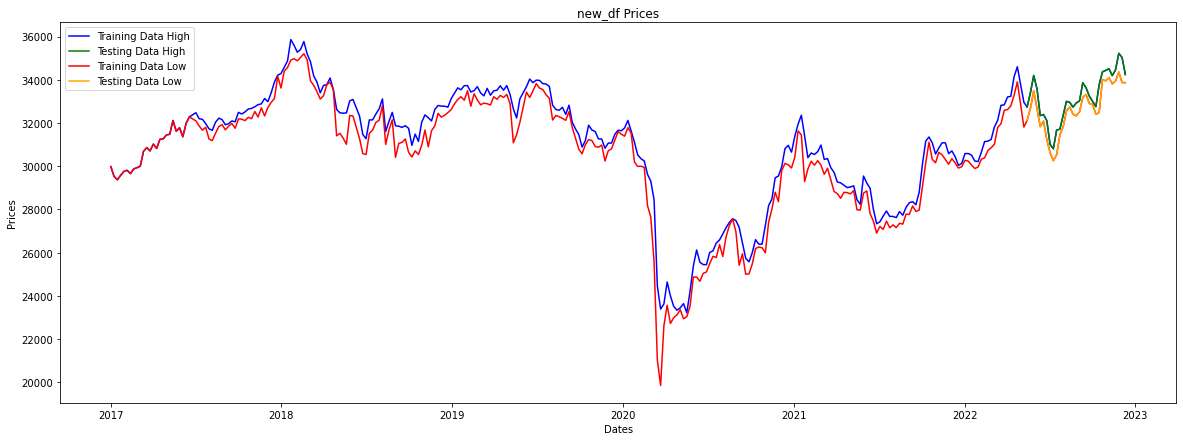

In [17]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [18]:
train_data

,High,Low
Date,,
2017-01-01,29982.369,29982.369
2017-01-08,29528.539,29528.539
2017-01-15,29371.279,29371.279
2017-01-22,29577.289,29577.289
2017-01-29,29760.340,29760.340
...,...,...
2022-04-03,33203.410,32620.881
2022-04-10,33234.121,32789.820
2022-04-17,34139.172,33280.711


In [19]:
test_data

,High,Low
Date,,
2022-05-15,32737.980,32121.939
2022-05-22,33404.711,32680.689
2022-05-29,34199.230,33482.000
2022-06-05,33581.480,32673.660
2022-06-12,32343.090,31832.490
2022-06-19,32389.930,32086.631
2022-06-26,32108.439,31228.820
2022-07-03,31011.369,30632.480
2022-07-10,30808.340,30258.471


## **6. Modeling**

### **6.1 Model Definition**

We will use ARIMA for the time series prediction

### **6.2 Model Training**

In [20]:
!pip install pmdarima

In [21]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=4805.276, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=4747.884, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=4725.318, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=4793.986, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=4709.647, Time=0.73 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,1)(0,1,3)[4]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,1)(1,1,3)[4]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=4720.329, Time=0.33 sec
 ARIMA(1,1,1)(0,1,2)[4]             : AIC=4711.216, Time=0.98 sec
 ARIMA(0,1,2)(0,1,2)[4]             : AIC=4710.702, Time=0.84 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=4711.411, Time=0.59 sec
 ARIMA(1,1,2)(0,1,2)[4]             : AIC=4713.716, Time=1.71 sec
 ARIMA(0,1,1)(0,1,2)[4] intercept   : AIC=4711.310, T

In [22]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=4957.922, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=4900.711, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=4875.738, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=4957.918, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=4858.070, Time=0.61 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=4900.596, Time=0.18 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=4862.142, Time=0.48 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=4893.359, Time=0.24 sec
 ARIMA(0,1,1)(2,1,2)[4]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=4857.923, Time=0.52 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=4875.480, Time=0.17 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=4900.339, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=4859.1

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

In [44]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(1,1,1))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


In [25]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(1,1,1))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **6.3 Model Evaluasi**

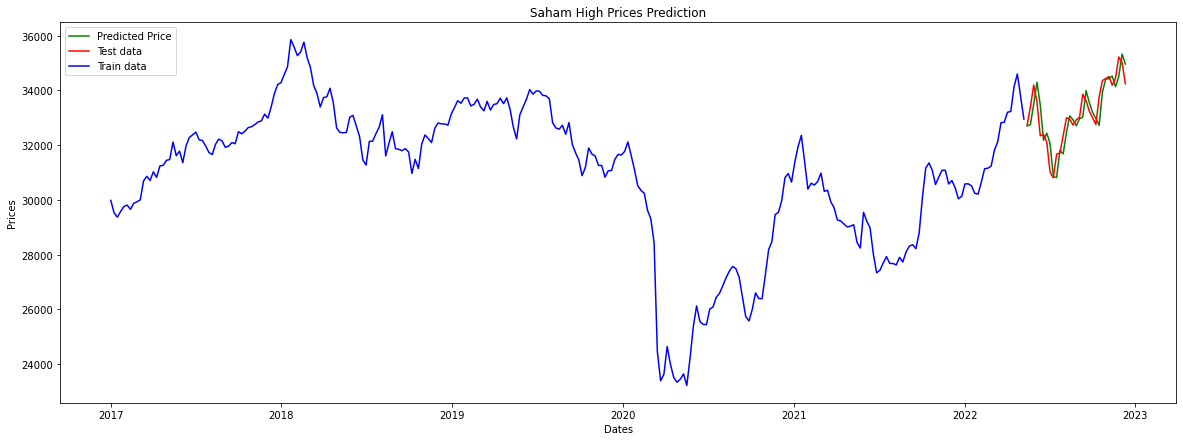

In [45]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

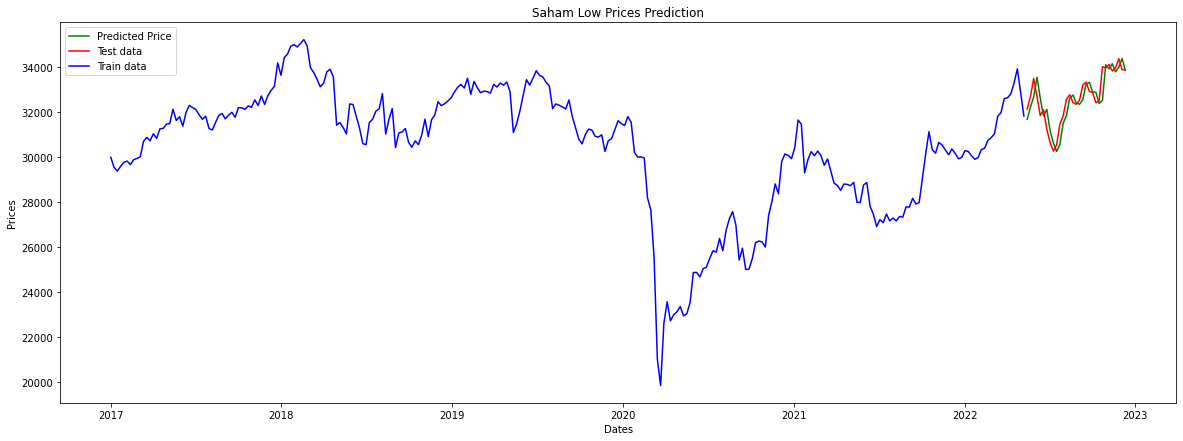

In [27]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [46]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,32737.980,32701.578710,32121.939,31666.242529
1,33404.711,32756.142093,32680.689,32211.605276
2,34199.230,33497.568979,33482.000,32659.433488
3,33581.480,34299.200452,32673.660,33536.282158
4,32343.090,33467.944201,31832.490,32603.428624
5,32389.930,32180.565848,32086.631,31820.586852
6,32108.439,32437.407252,31228.820,32107.162281
7,31011.369,32054.163621,30632.480,31169.284424
8,30808.340,30855.972998,30258.471,30629.842530
9,31672.730,30817.220157,30525.840,30237.268935


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [47]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

In [48]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,31122.188143,435.519584,295208.248016,543.330699,0.013128
1,Low,30599.186720,432.734122,292167.966143,540.525639,0.013297


## **7. Prediction**

In [49]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


In [50]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,34972.243051
2022-12-25,34971.239811
2023-01-01,34971.367602
2023-01-08,34971.351325


In [34]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,33853.292912
2022-12-25,33844.504729
2023-01-01,33848.761865
2023-01-08,33846.699641


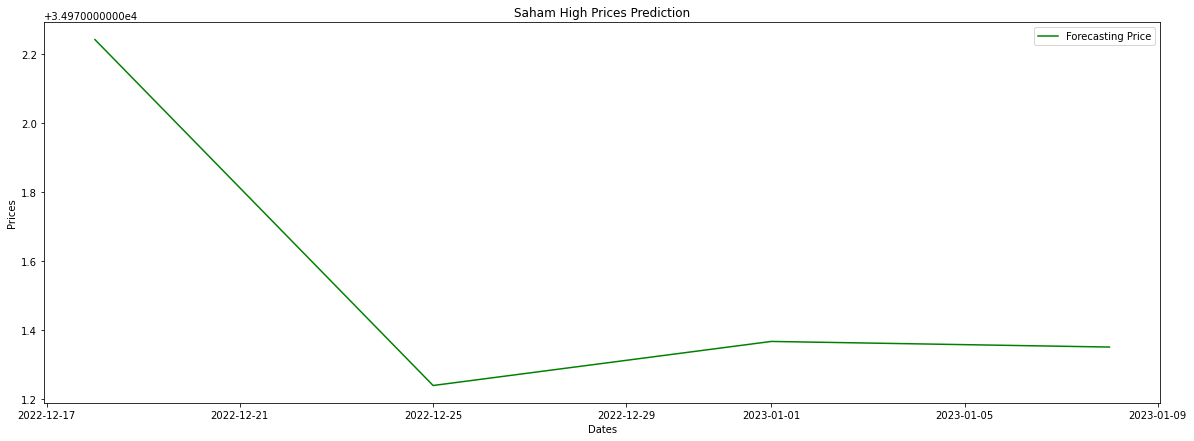

In [51]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='Forecasting Price')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

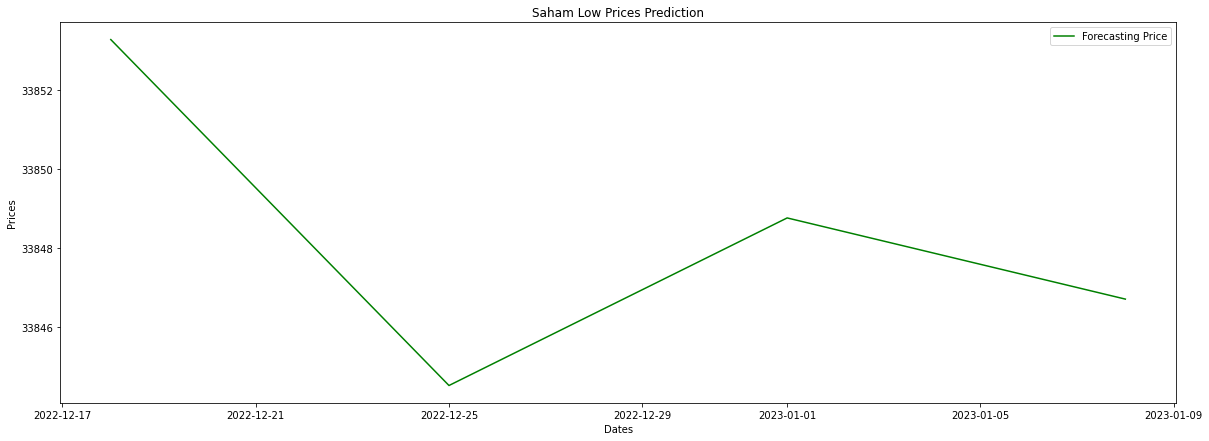

In [36]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Forecasting Price')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()